In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [126]:

# return [W x H x threshold_T x 1]
fpaths = np.load("/home/joono/fpath_infodraw/dataset/train/fpath_npzs/color_1_fpath_of_infodraw.npz")['data']

# reshape to [WH x threshold_T]
w, h, t, _ = fpaths.shape
fpaths_linear = fpaths.reshape(w * h, t) 

# return image of [H x W x C]
target = cv2.imread("/home/joono/fpath_infodraw/dataset/train/targets/line_1.png")
# convert gray scale image of [H x W]
target_gray = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY).astype(np.float32)
target_gray = cv2.normalize(target_gray, None, 0.0, 1.0, cv2.NORM_MINMAX)

# transpose to [W x H]
target_gray = target_gray.transpose(1, 0)
w_t, h_t = target_gray.shape

assert w == w_t and h == h_t, f"w, w_t and h, h_t must be same. but {w=}, {w_t=}, {h=}, {h_t=}"

# reshape to [WH x 1]
target_linear = target_gray.reshape(w_t * h_t, 1)

In [128]:
print(f"{fpaths_linear.shape=}, {target_linear.shape=}")

fpaths_linear.shape=(1048576, 21), target_linear.shape=(1048576, 1)


In [129]:
fpaths_linear[:, 10], target_linear[:, 0]

(array([1., 1., 1., ..., 1., 1., 1.], dtype=float32),
 array([1., 1., 1., ..., 1., 1., 1.], dtype=float32))

In [130]:
np.sum(fpaths_linear[:, 10] - target_linear[:, 0])

3092.9338

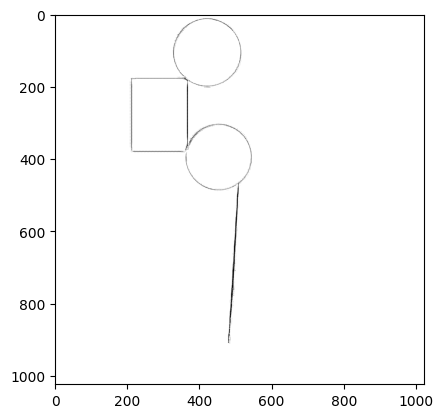

In [131]:
plt.imshow(fpaths_linear[:, 10].reshape(w, h), cmap='gray')

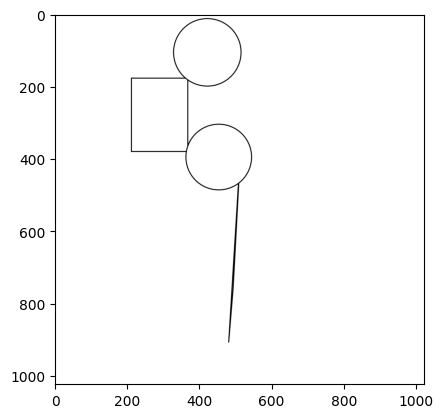

In [132]:
plt.imshow(target_linear[:, 0].reshape(w, h), cmap='gray')

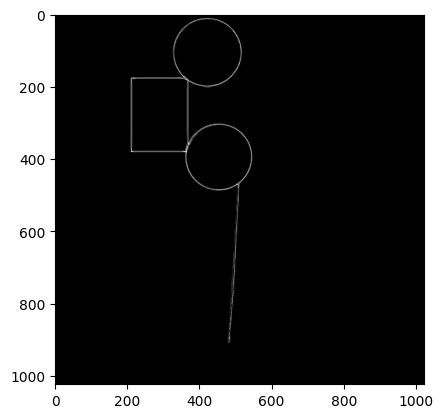

In [133]:
error = np.abs(fpaths_linear[:, 10] - target_linear[:, 0])
plt.imshow(error.reshape(w, h), cmap='gray')

In [66]:
print(f"{np.min(error)=}, {np.max(error)=}")

np.min(error)=0.0, np.max(error)=1.0


In [68]:
cv2.imwrite("error.png", error.reshape(w, h) * 255)

True

In [79]:
print(f"""{len(target_linear[target_linear == 0.0])=}, {len(target_linear[target_linear == 1.0])=}""")

len(target_linear[target_linear == 0.0])=4108, len(target_linear[target_linear == 1.0])=1039354


In [77]:
len(target_linear)

1048576

In [134]:
fpath_target_concat = np.concatenate([fpaths_linear, target_linear], axis=1)

In [135]:
cv2.imwrite("fpath_for_black.png", fpath_target_concat[np.where(target_linear == 0.0)[0]] * 255)
cv2.imwrite("fpath_for_white.png", fpath_target_concat[np.where(target_linear == 1.0)[0]][20000:30000] * 255)

True

In [111]:
fpath_target_concat[np.where(target_linear == 1.0)[0], :].shape

(1039354, 22)

In [122]:
np.where(target_linear == 0.0)[0][0]

12699

In [124]:
12699 // 1024, 12699 % 1024

(12, 411)

In [154]:
target_gray[12, 411]

fpath_on_12_411 = fpaths[11:14, 410:413]

fpath_on_12_411 = fpath_on_12_411.reshape(9, 21)

In [143]:
cv2.imwrite("fpath_on_12_411.png", fpath_on_12_411 * 255)

True

In [155]:
fpath_on_12_411_big = cv2.resize(fpath_on_12_411, (2100, 900), interpolation=cv2.INTER_NEAREST)

In [156]:
cv2.imwrite("fpath_on_12_411_big.png", fpath_on_12_411_big * 255)

True